Regresión de Huber y outliers --- 8:24 min
=====

* 8:24 min | Ultima modificación: Abril 13, 2021 | [YouTube](https://youtu.be/vEPeHpv-pqE)

Fuente: https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html#sphx-glr-auto-examples-linear-model-plot-huber-vs-ridge-py

In [1]:
import numpy as np
from sklearn.datasets import make_regression

#
# Generación de datos
#
rng = np.random.RandomState(0)
X, y = make_regression(
    n_samples=20,
    n_features=1,
    random_state=0,
    noise=4.0,
    bias=100.0,
)

In [2]:
X, y

(array([[-0.15135721],
        [ 0.40015721],
        [ 0.97873798],
        [-0.85409574],
        [-0.97727788],
        [ 0.3130677 ],
        [-0.10321885],
        [-0.20515826],
        [ 0.33367433],
        [ 1.49407907],
        [ 0.95008842],
        [ 0.12167502],
        [ 1.45427351],
        [ 1.86755799],
        [ 0.14404357],
        [ 0.4105985 ],
        [ 0.76103773],
        [ 2.2408932 ],
        [ 0.44386323],
        [ 1.76405235]]),
 array([ 98.01970393, 108.45865411, 107.77654399,  90.31520078,
         92.04796546, 100.14472604, 104.37128562,  95.20896669,
        102.50526212, 122.11966081, 112.28760019, 107.32614044,
        121.44454917, 125.80345967, 104.3306721 , 112.02618102,
        106.59661396, 129.8571502 , 113.51286154, 125.42202601]))

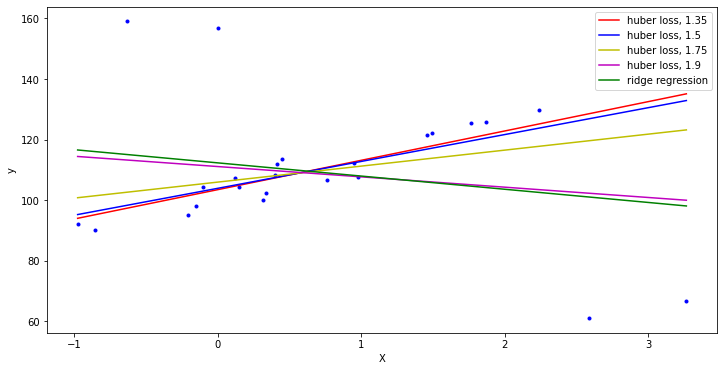

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, Ridge

#
# Adiciona cuatro outliers fuertes al dataset
#
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)

X_outliers[:2, :] += X.max() + X.mean() / 4.0
X_outliers[2:, :] += X.min() - X.mean() / 4.0

y_outliers[:2] += y.min() - y.mean() / 4.0
y_outliers[2:] += y.max() + y.mean() / 4.0

X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

plt.figure(figsize=(12, 6))
plt.plot(X, y, "b.")

#
# Colores dependiendo de los parámetros de la función de
# error de Huber
#
colors = ["r-", "b-", "y-", "m-"]

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1.35, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(
        fit_intercept=True,
        alpha=0.0,
        max_iter=100,
        epsilon=epsilon,
    )
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)

#
# Ridge regression
#
ridge = Ridge(
    fit_intercept=True,
    alpha=0.0,
    random_state=0,
    normalize=True,
)
ridge.fit(X, y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, "g-", label="ridge regression")


plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()